In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from Kildekode._12_IIRFilt import *
from Kildekode._14_Z_transformasjon import *

%matplotlib ipympl

<img src="NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Z-transformasjon del 3

* **Emne AIS2201 - Signalbehandling**
* **Uke 13, 2022**
* **Underviser: Kai Erik Hoff**

## Tema:
* Repetisjon poler og nullpunkt i z-planet
    * Poler og nullpunkt $\leftrightarrow$ transferfunksjon $H(z)$
    * Poler og nullpunkt $\leftrightarrow$ frekvensrespons $H(z)$
* Skalering av output for IIR-filtre
* Impulsrespons andreordens IIR-filter
* Stabilitet for digitale filtre
* Spesielle filteroperasjoner

# Repetisjon: Transferfunksjon / overføringsfunksjon

* Z-transformen av impulsresponen $h[n]$ til et LTI-system kalles systemets *transferfunksjon*
* For ethvert kausalt LTI-system med filterkoeffisienter $a_k$ og $b_k$, vil transferfunksjonen være:
\begin{align}
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}\\
&\text{eller}\\
&= \frac{b_0 + b_1\cdot z^{-1} + b_2 \cdot z^{-2} + \ldots + b_M \cdot z^{-M}}{a_0 + a_1\cdot z^{-1} + a_2 \cdot z^{-2} + \ldots + a_N \cdot z^{-N}}
\end{align}
* Teller og nevner er polynomfunksjoner

## Repetisjon: Nullpunkt
<img src="Figurer/14_Ztransform/PZ_lecture/Slide2.PNG" style="width: 70%" align="left"/>

## Repetisjon: Poler 
<img src="Figurer/14_Ztransform/PZ_lecture/Slide3.PNG" style="width: 70%" align="left"/>

## Repetisjon: Poler og nullpunkt til transferfunksjon
<img src="Figurer/14_Ztransform/PZ_lecture/Slide4.PNG" style="width: 70%" align="left"/>

# Poler, nullpunkt og frekvensrespons
<img src="Figurer/14_Ztransform/PZ_lecture/Slide10.PNG" style="width: 70%" align="left"/>

## Illustrasjon
<img src="Figurer/14_Ztransform/PZ_lecture/Slide11.PNG" style="width: 80%" align="left"/>


## Kodeeksempel: Frihåndsdesign av filter

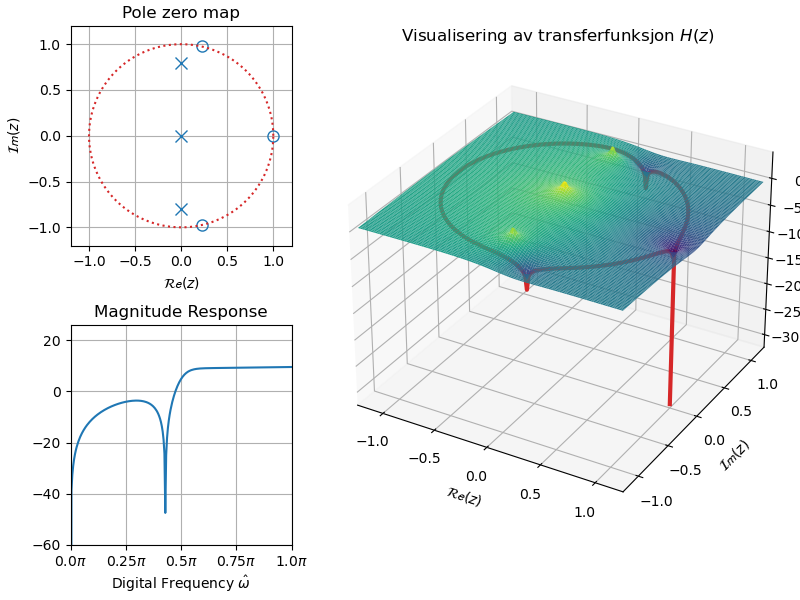

In [2]:
# Angi nullpunktskoordinater
zeroes = np.array([1, 
                   exp(1j*3*pi/7), 
                   exp(-1j*3*pi/7)])

# Angi polkoordinater
poles = np.array([0.8*exp(1j*pi/2), 
                  0.8*exp(-1j*pi/2)])

# Regn ut filterkoeffisienter med funksjonen np.poly()
b = np.real(np.poly(zeroes))
a = np.real(np.poly(poles))

visualizeTF(b, a, fig_num=1)

# Quiz:
<img src="Figurer/14_Ztransform/PZ_lecture/Slide17.PNG" style="width: 90%" align="left"/>

# Skalering av output

* Algebraisk utregning av filter basert på formelen 
$$H(z) = \frac{(z-z_1)(z-z_2)\cdot \ldots \cdot (z-z_M)}{(z-p_1)(z-p_2)\cdot \ldots \cdot (z-p_M)}\frac{z^{N}}{z^{M}}$$
gir et filter med riktig ***form*** på styrkegradsresponsen, men det kan godt hende at maksimal gain gjennom filteret er mye større enn 1, noe som fort kan være uønsket.


* For å skalere utgangen slik at gain i passbåndet er ca. lik 1, kan følgende prosedyre følges:
    1. Identifiser hvor filterets passbånd befinner seg, og velg ut én frekvens $\hat{\omega}_{ref}$ å bruke som referanse.
    2. Regn ut styrkegradsresponsen $\left| H(\hat{\omega}_{ref})\right|$ for referansefrekvensen $\hat{\omega}_{ref}$.
    3. Regn så ut skaleringsfaktoren $K = \frac{ 1}{\left| H(\hat{\omega}_{ref})\right|}$.
    4. Påfør skalering på transferfunksjonen: $K \cdot H(z)$

## Regneeksempel 1:

* Et filter har transferfunksjonen 
$$H(z) = K \cdot \frac{1 - z^{-1}+ z^{-2}}{1+0.7\cdot z^{-1}+0.49\cdot z^{-2}}$$
der skaleringsfaktoren $K$ ikke er definert.
Identifiser filterformen, og finn en skaleringsfaktor $K$, som fører til at $\left| H\left(\hat{\omega}\right)\right| \approx 1$ i passbåndet.

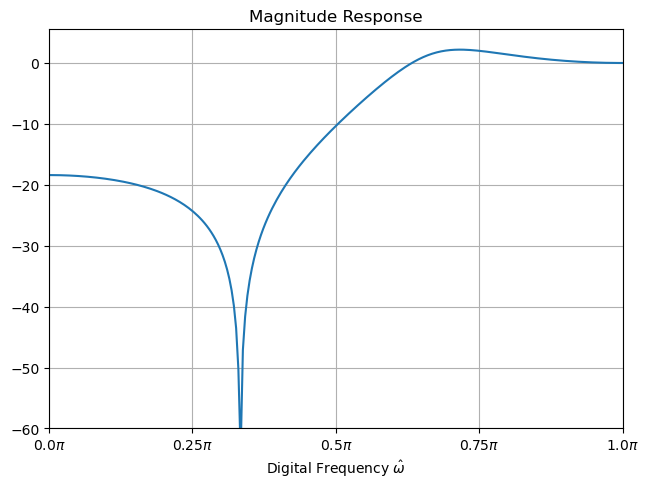

In [3]:
%matplotlib inline
b = np.array([1, -1, 1])*0.26333
a = np.array([1, 0.7, 0.49])
plt.close(2); plt.figure(2)
Magnitude_dB(b, a)

# Utregning av impulsrespons

* Impulsresponsen $h[n]$ kan vi finne ved å ta invers z-transformasjon av transferfunksjonen $H(z)$ 
$$Z^{-1}\left(H(z)\right) = h[n]$$
* Involverer omregning for å uttrykke $H(z)$ som en kombinasjon av kjente transformasjonspar.
    * Utføres typisk ved å algebraisk manipulasjon av transferfunksjonen inntil den er delt opp i små uttrykk med kjente inverstransformerte. 
* Ikke noe man typisk gjør for hånd, men det er nyttig å ha en viss forståelse for impulsresponsen til spesielt førsteordens- og andreordens IIR-filtre.

## Vanlige transformasjonspar
<img src="Figurer/14_Ztransform/Fig1_ZtransPairs.png" style="width: 70%; margin-left: 50px" />

## Kodeeksempel 1: Impulsrespons andreordens filter

* Finn filterkoeffisienter til et filter med to poler i $z = 0.9\cdot e^{\pm j\cdot \frac{\pi}{3}}$, og ett nullpunkt i $z = 0.45$. Vis deretter *impulsresponsen* til filteret i en figur.

<StemContainer object of 3 artists>

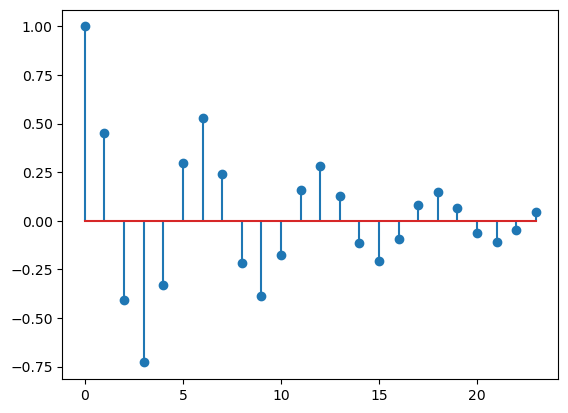

In [4]:
zeroes = [0.45]
poles = [0.9*exp(1j*pi/3), 0.9*exp(-1j*pi/3)]

b = np.real(np.poly(zeroes))
a = np.real(np.poly(poles))

dn = np.zeros(24)
dn[0] = 1

hn = sig.lfilter(b, a, dn)

plt.close(3); plt.figure(3)
plt.stem(hn)

# Filteregenskaper: Stabilitet
<img src="Figurer/14_Ztransform/PZ_lecture/Slide12.PNG" style="width: 70%" align="left"/>

# Stabilitet
* Definisjon i $n$-domenet: 
    * Et filter som påtrykkes et inngangssignal $x[n]$ som er avgrenset mellom to definerbare maks- og minimumsverdier, skal også ha et utgangssignal $y[n]$ som er avgrenset mellom to definerbare maks- og minimumsverdier.
        * Impulsresponsen $h[n]$ til et stabilt filter vil konvergere mot 0, og impulsresponsen til et ustbailt filter vil divergere.
* Definisjon av stabilitet i z-domenet:
    * Et filter er stabilt dersom alle filterets poler befinner seg innenfor enhetssirkelen.
    * Et filter er såkalt "marginalt stabilt" dersom det har poler ***på*** enhetssirkelen
    * Et filter er ustabilt dersom det har poler utenfor enhetssirkelen

## Kodeillustrasjon: Impulsrespons andreordens IIR-filtre
* Ser på følgende:
    1. Impulsrespons for et filter med to poler i $z=0.9\cdot e^{\pm j\cdot \frac{\pi}{8}}$
    2. Impulsrespons for et filter med to poler i $z=1.0\cdot e^{\pm j\cdot \frac{\pi}{8}}$
    3. Impulsrespons for et filter med to poler i $z=1.1\cdot e^{\pm j\cdot \frac{\pi}{8}}$

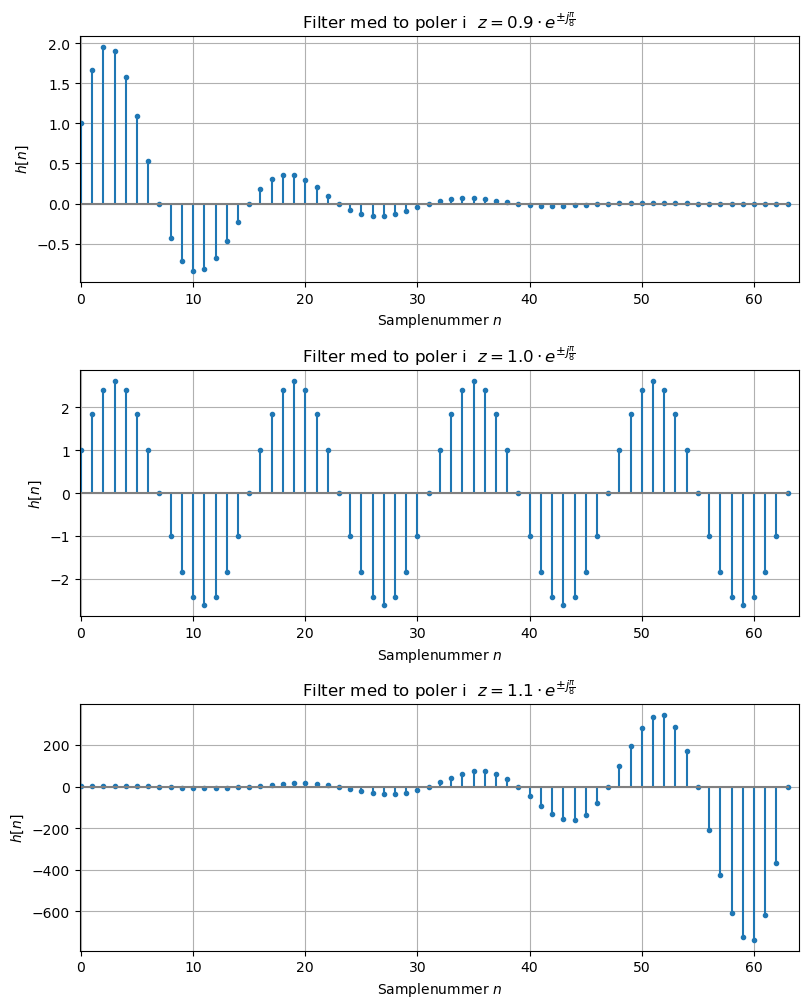

In [5]:
xn = np.zeros(64)
xn[0] = 1


r = [0.9, 1.0, 1.1] # Array med radius for polkoordinater innenfor, på & utenfor enhetssirkelen.

plt.close(4); plt.figure(4, figsize=(8,10))
for i in np.arange(3):
    plt.subplot(3,1,i+1)
    poles = r[i]*exp(1j*np.array([pi/8, -pi/8])) 
    b = [1]
    a = np.real(np.poly(poles))
    hn = sig.lfilter(b, a, xn)
    plt.stem(hn, markerfmt=".", basefmt="grey")
    plt.xlim([-0.1, len(xn)])
    plt.grid(True)
    plt.xlabel('Samplenummer $n$')
    plt.ylabel(r'$h[n]$')
    plt.title(r"Filter med to poler i  $z = "+str(r[i])+r"\cdot e^{\pm j \frac{\pi}{8}}$")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Noen nyttige manipulasjoner av IIR-filtre:
* Inversfiltre/rekonstruksjonsfiltre
* Komplementærfiltre
* Digital Frekvenstraonsformasjon
* Konstruksjon av båndpassfiltre
* Konstruksjon av båndstoppfiltre

# Inversfiltre/Rekonstruksjonsfiltre

* For et filter med transferfunksjon $H(z)$ kan det finnes et inversfilter $H^{-1}(z)= \frac{1}{H(z)}$.
* $H(z)$ og $ H^{-1}(z)$ i kaskade kansellerer hverandre.
* Forutsetter at både $H(z)$ og $H^{-1}(z)$ er stabile.
<img src="Figurer/14_Ztransform/Fig5_Reconstruction.png" style="width: 60%; margin-left: 150px" />
* Ofte referert til som rekonstruksjonsfilter.
* Grunnlag for konsept som ekkokansellering m.m.

# Komplementærfiltre

* ***Komplementærfilteret*** $H_{\text{comp}}(\hat{\omega})$ til et filter med styrkegradsrespons $\left| H(\hat{\omega}) \right|$ er et filter er styrkegradsresponsen er $\left|H_{\text{comp}}(\hat{\omega})\right| = 1 - \left| H(\hat{\omega}) \right|$
* For førsteordens IIR-filtre gjelder:
    $$H_{\text{comp}}(z) = 1 - H(z)$$
* Eksempel på bruk: **Sensor Fusion**.
    * Beregning av vinkelen til en drone basert på gyroskop og akselerometer. 
        * **Gyroskop** responderer bra til endringer i vinkel, men vil ofte ha en bias.
        * **Akselerometer** vil ha en god *gjennomsnittsverdi*, men plukker opp mye støy.
        * Ved å kombinere lavpassfiltrerte målinger fra akselerometer og høypassfiltrerte målinger fra gyroskopet, vil vi utnytte de beste egenskapene til begge sensorene.
    * For mer detaljert gjennomgang: [video om dronekontroll](https://www.youtube.com/watch?v=whSw42XddsU)

## Regneeksempel 2:
* Finn komplementærfilteret til lavpassfilteret $H(z) = \frac{0.1}{1-0.9\cdot z^{-1}}$

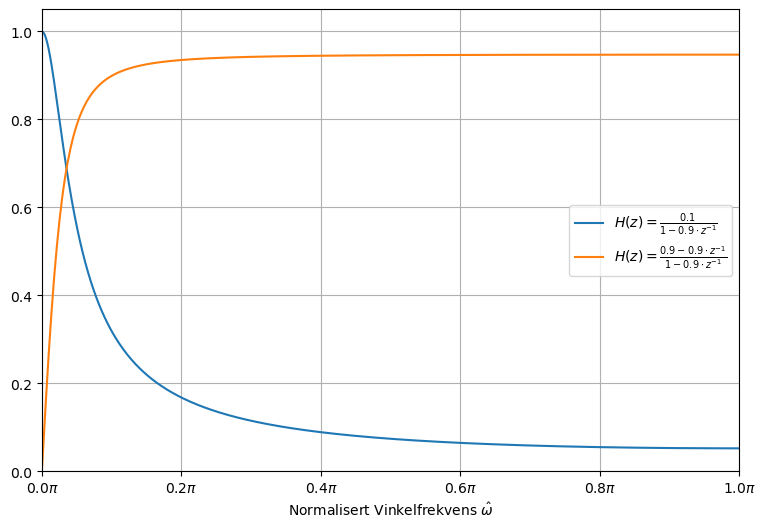

In [6]:
# 
b1, a1 = [0.1], [1, -0.9] # Førsteordens lavpassfilter
b2, a2 = [0.9, -0.9], [1, -0.9] # Komplementærfilter

w, H1 = sig.freqz(b1, a1)
w, H2 = sig.freqz(b2, a2)

plt.close(5); plt.figure(5, figsize=(9,6))
plt.plot(w, np.abs(H1), label=r'$H(z) = \frac{0.1}{1-0.9\cdot z^{-1}}$')
plt.plot(w, np.abs(H2), label=r'$H(z) = \frac{0.9 - 0.9\cdot z^{-1}}{1-0.9\cdot z^{-1}}$')
plt.grid(True)
plt.xlim([0, pi])
plt.ylim(ymin=0)
plt.xticks(np.linspace(0, pi, 6), [r'$'+str(round(x,2))+r'\pi$' for x in np.linspace(0, 1, 6)] )
plt.xlabel(r"Normalisert Vinkelfrekvens $\hat{\omega}$")
plt.legend()
plt.show()

# Digital Frekvenstransformasjon

* FIR filtre kan enkelt modifiseres med modulasjo ($h_{HP}[n]=h_{LP}[n]\cdot (-1)^n$).
    * Veldig lett når filterkoeffisientene $b_k$ korresponderer med impulsresponsen $h[n]$.
* Tilsvarer $\pi$ radianer rotasjon av pol- og nullpunktskartet rundt $z=0$.


<img src="Figurer/14_Ztransform/Fig6_LP2HP.png" style="width: 90%; margin-left: 50px" />


* Kan også utføres i z-planet med zubstitusjonen $H_{HP}(z) = H_{LP}(z)\big|_{z = -z}$
    * I praksis det samme som å bytte fortegn på alle poler og nullpunkt

# Konstruksjon av båndpassfiltre

* Modulasjonsegenskapen kan ikke brukes på samme måte som for IIR filter
* Enkleste måte å lage et båndpassfilter er å kombinere høypass og lavpassfilter i kaskade.
    - Forutsetter at både lavpassfilter og høypassfilter har et overlappende passbånd.
<img src="Figurer/14_Ztransform/Fig9_Cascade.png" style="width: 90%; margin-left: 50px" />

# Konstruksjon av båndstoppfiltre
* Et båndstoppfilter kan enklest lages ved å koble to filtre i parallell.
<img src="Figurer/14_Ztransform/Fig10_Parallel.png" style="width: 90%; margin-left: 50px" />

## Kodeeksmepel 2: manuelt design av båndpassfilter
* Bruk lavpassfilteret utregnet nedenfor til å laget et båndpassfilter.

(-80.0, 5.625715010258475)

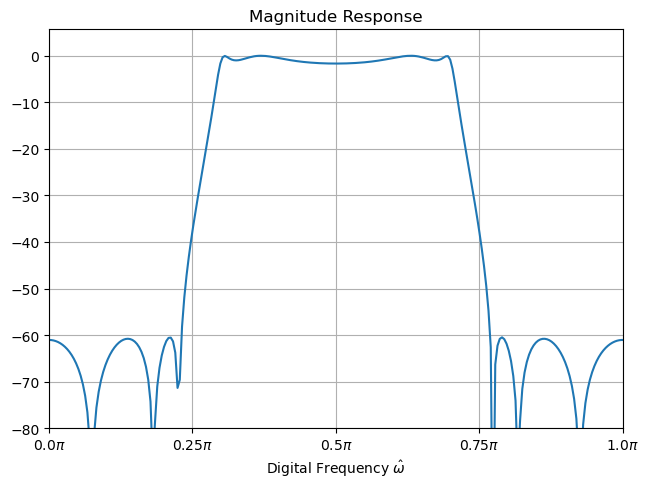

In [7]:
b, a = sig.ellip(6, 1, 60, 0.7)

b_hp = b*(-1)**np.arange(len(b))
a_hp = a*(-1)**np.arange(len(a))

b_bp = np.convolve(b_hp, b)
a_bp = np.convolve(a_hp, a)

plt.close(6);plt.figure(6)
Magnitude_dB(b_bp, a_bp)
plt.ylim(ymin=-80)

# Lavpass filterdesign med Python

* `scipy.signal` inneholder funksjoner en rekke filtre, beskrevet [her](https://docs.scipy.org/doc/scipy/reference/signal.html#matlab-style-iir-filter-design)
* Kodecellen nedenfor viser et eksempel på 5 ulike framgangsmåter for å lage et 6. ordens lavpassfilter med knekkfrekvens $\hat{\omega}_c=0.4\pi$.

In [1]:
N = 6
w_c = 0.4*pi

b1, a1 = sig.butter(N,              # Filterorden
                    Wn=w_c/pi,      # Knekkfrekvens 
                    btype='lowpass' # Filtertype
                   )

b2, a2 = sig.cheby1(N,              # Filterorden
                    rp=0.5,         # Maksimal tillatt rippel i passbånd (dB)
                    Wn=w_c/pi,      # Knekkfrekvens 
                    btype='lowpass' # Filtertype
                   )

b3, a3 = sig.cheby2(N,              # Filterorden
                    rs=30,          # Minimum stoppbåndsdemping (dB)
                    Wn=w_c/pi,      # Stoppbpånd Kantfrekvens
                    btype='highpass' # Filtertype
                   )

b4, a4 = sig.ellip(N,                # Filterorden
                    rp=0.5,          # Maksimal tillatt rippel i passbånd (dB)
                    rs=30,           # Minimum stoppbåndsdemping
                    Wn=w_c/pi,       # Knekkfrekvens 
                    btype='lowpass'  # Filtertype
                   )
b5, a5 = sig.bessel(N,               # Filterorden
                    Wn=w_c/pi,       # Knekkfrekvens 
                    btype='lowpass'  # Filtertype
                   )

plt.close(7); plt.figure(7, figsize=(16,9))

displayFrequencyResponse(b1, a1, mag='lin', label='Butterworth')
displayFrequencyResponse(b2, a2, mag='lin', label='Chebychev type 1')
displayFrequencyResponse(b3, a3, mag='lin', label='Chebychev type 2')
displayFrequencyResponse(b4, a4, mag='lin', label='Elliptical')
displayFrequencyResponse(b5, a5, mag='lin', label='Bessel/Thompson')

NameError: name 'pi' is not defined

# Spørsmål?